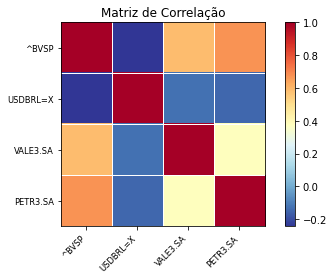

In [35]:
#https://opencodecom.net/post/2021-09-01-correlacao-entre-ativos-no-python/
#https://analisemacro.com.br/mercado-financeiro/graficos-para-analises-e-operacoes-no-python/

import yfinance as yf
import pandas as pd 
import numpy as np
import statsmodels.api as sm #### biblioteca para plotar correlacao
import matplotlib.pyplot as plt

#etf_lista = ['^BVSP', 'GLD', 'XLE', 'XLF', 'XLI', 'XLP']
etf_lista = ['^BVSP', 'USDBRL=X','VALE3.SA','PETR3.SA']
#etf_lista = ['^BVSP','^DJI']

## extrair dados de uma vez com yf.download
etf = ' '.join(etf_lista)
df  = yf.download (etf, 
                   #period = "1w",
                   start = '2022-09-10', end = '2022-10-14',
                   interval = "5M",
                   group_by = 'ticker', ## poderá chamar df[ticker]
                   progress = False)

### Calcular rentabilidade usando pct_change
for etf in etf_lista:
    df[(etf, 'Return')] = df[(etf, 'Close')].pct_change()

    
### dataframe dg apenas com rentabilidades de cada etf 
colunas = list()
for elem in etf_lista:
    colunas.append((elem, 'Return'))
dg = df.filter(items=colunas)
dg.columns = etf_lista ### muda nome das colunas
dg.tail()

correlacao = dg.corr()

#plotar correlação
sm.graphics.plot_corr(correlacao, xnames=correlacao.columns)
plt.title("Matriz de Correlação")
plt.show()

In [7]:
df

^BVSP                                \
                                    Open           High            Low   
Datetime                                                                 
2022-10-13 23:00:00+00:00            NaN            NaN            NaN   
2022-10-13 23:30:00+00:00            NaN            NaN            NaN   
2022-10-14 00:00:00+00:00            NaN            NaN            NaN   
2022-10-14 01:30:00+00:00            NaN            NaN            NaN   
2022-10-14 02:00:00+00:00            NaN            NaN            NaN   
2022-10-14 10:30:00+00:00            NaN            NaN            NaN   
2022-10-14 11:00:00+00:00            NaN            NaN            NaN   
2022-10-14 11:30:00+00:00            NaN            NaN            NaN   
2022-10-14 12:00:00+00:00            NaN            NaN            NaN   
2022-10-14 12:30:00+00:00            NaN            NaN            NaN   
2022-10-14 13:00:00+00:00  114300.679688  114653.148438  114260.960938   
2022-10-14 13:30:00+00:00  114636.367188  114712.031250  114028.796875   
2022-10-14 14:00:00+00:00  114521.898438  114583.750000  113859.921875   
2022-10-14 14:30:00+00:00  114037.703125  114117.460938  113279.539062   
2022-10-14 15:00:00+00:00  113684.062500  113816.062500  113182.179688   
2022-10-14 15:30:00+00:00  113733.078125  113849.921875  113077.523438   
2022-10-14 16:00:00+00:00  113177.812500  113357.273438  112944.093750   
2022-10-14 16:30:00+00:00  113099.101562  113704.226562  113099.101562   
2022-10-14 17:00:00+00:00  113614.921875  113697.273438  113229.062500   
2022-10-14 17:30:00+00:00  113711.078125  113931.296875  113648.390625   
2022-10-14 18:00:00+00:00  113809.523438  113809.523438  113164.257812   
2022-10-14 18:30:00+00:00  113345.750000  113420.226562  112661.140625   
2022-10-14 19:00:00+00:00  112657.203125  112833.507812  111631.398438   
2022-10-14 19:30:00+00:00  111982.398438  112021.390625  111871.906250   

                                                                 PETR3.SA  \
                                   Close      Adj Close Volume       Open   
Datetime                                                                    
2022-10-13 23:00:00+00:00            NaN            NaN    NaN        NaN   
2022-10-13 23:30:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 00:00:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 01:30:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 02:00:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 10:30:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 11:00:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 11:30:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 12:00:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 12:30:00+00:00            NaN            NaN    NaN        NaN   
2022-10-14 13:00:00+00:00  114647.492188  114647.492188    0.0  37.910000   
2022-10-14 13:30:00+00:00  114455.601562  114455.601562    0.0  37.750000   
2022-10-14 14:00:00+00:00  114062.757812  114062.757812    0.0  37.779999   
2022-10-14 14:30:00+00:00  113681.296875  113681.296875    0.0  37.500000   
2022-10-14 15:00:00+00:00  113723.328125  113723.328125    0.0  37.400002   
2022-10-14 15:30:00+00:00  113227.843750  113227.843750    0.0  37.490002   
2022-10-14 16:00:00+00:00  113012.671875  113012.671875    0.0  37.360001   
2022-10-14 16:30:00+00:00  113598.617188  113598.617188    0.0  37.290001   
2022-10-14 17:00:00+00:00  113697.273438  113697.273438    0.0  37.360001   
2022-10-14 17:30:00+00:00  113789.796875  113789.796875    0.0  37.470001   
2022-10-14 18:00:00+00:00  113329.359375  113329.359375    0.0  37.639999   
2022-10-14 18:30:00+00:00  112661.140625  112661.140625    0.0  37.549999   
2022-10-14 19:00:00+00:00  111935.750000  111935.750000    0.0  37.360001   
2022-10-14 19:30:00+00:00  111910.

In [154]:
#https://opencodecom.net/post/2021-09-01-correlacao-entre-ativos-no-python/

from datetime import datetime
import MetaTrader5 as mt5
import time
import telepot
import pytz
import numpy as np

# importamos o módulo pandas para exibir os dados recebidos na forma de uma tabela
import pandas as pd
pd.set_option('display.max_columns', 500) # número de colunas
pd.set_option('display.width', 1500)      # largura máxima da tabela
pd.options.mode.chained_assignment = None  # default='warn'

if not mt5.initialize(login=1092947504, server="ClearInvestimentos-DEMO", password="Joh0516"):
#if not mt5.initialize(login=4999473749, server="MetaQuotes-Demo", password="elf4lnbx"):
    print("initialize() failed, error code =",mt5.last_error())
    quit()

# >>> IBOV <<<
ratesIBOV = mt5.copy_rates_from_pos('IBOV', mt5.TIMEFRAME_M1, 0, 800)
rates_frame = pd.DataFrame(ratesIBOV)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
resumo = rates_frame[['time','open','high','low','close','tick_volume']]
IBOV = resumo[['close']].tail()
#IBOV = IBOV.set_index('close')
#IBOV

# >>> Indice <<<
ratesIndice = mt5.copy_rates_from_pos('WINV22', mt5.TIMEFRAME_M1, 0, 800)
rates_frame = pd.DataFrame(ratesIndice)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
resumo = rates_frame[['time','open','high','low','close','tick_volume']]
Indice = resumo[['close']].tail()
#Indice

# >>> Dolar <<<
ratesDolar = mt5.copy_rates_from_pos('WDOU22', mt5.TIMEFRAME_M1, 0, 800)
rates_frame = pd.DataFrame(ratesDolar)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
resumo = rates_frame[['time','open','high','low','close','tick_volume']]
Dolar = resumo[['close']].tail()
#Dolar

In [155]:
resumo = pd.DataFrame()
resumo['IBOV'] = IBOV['close']
resumo['Indice'] = Indice['close']
resumo['Dolar'] = Dolar['close']
display(resumo)

,IBOV,Indice,Dolar
795,111481.0,113200.0,5186.0
796,111481.0,113275.0,5185.5
797,111496.0,113240.0,5185.0
798,111496.0,113235.0,5186.0
799,111496.0,113220.0,5186.0


In [2]:
def download_action(acao,start,end=datetime.datetime.now()):
  '''
  Faz o download dos dados de uma acao no yahoo finance
  input:
    acao: string  codigo da açao  ex: MGLU3,
    start: datetime/string  data de inicio no formato ano-mes-dia
    end: datetime/string  data de fim no formato ano-mes-dia. Default: data atual
   '''  
  try:
    ac = acao +'.SA'
    serie = web.DataReader(ac,data_source='yahoo',start=start,end=end).reset_index()
  except:
    serie = web.DataReader(acao,data_source='yahoo',start=start,end=end).reset_index()
  return serie

def analise_acoes(lista_de_acoes,start,end=datetime.datetime.now(),reference='Close'):
  '''
  Retorna um daframe com os precos negocidos das acoes listadas juntamente com ibovespa,
  para o periodo analisado.
  input:
    lista_de_acoes: lista  lista python contendo as siglas das acoes desejadas
    start: datatime  data de inicio do intervalo de interesse
    end: datatime  data de fim do intervalo de interesse
    reference: string parâmetro de referencia ('High	Low	Open	Close	Volume')
  '''  
  acoes = pd.DataFrame()
  for i in lista_de_acoes:
    df = download_action(i,start,end=end)
    acoes[i] = df[reference].values
    acoes.index = df['Date']
  IBOVESPA = web.DataReader("^BVSP",data_source='yahoo',
                       start=start,end=end)  
  acoes['BVSP'] = IBOVESPA[reference].values
  return acoes

NameError: name 'datetime' is not defined